# 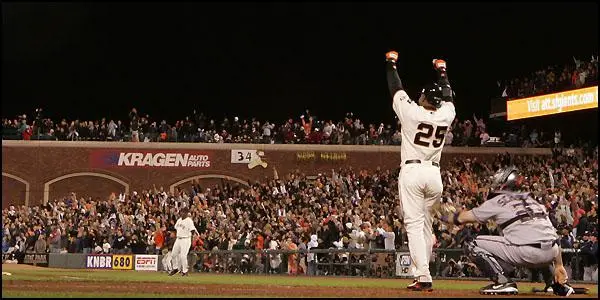

In [ ]:
if not 'statsapi' in globals():
    !pip install -q MLB-StatsAPI
import statsapi
import pandas as pd
import numpy as np
def home_run_getter(player_name):
    player_name = player_name
    season = 2025
    game_type = 'r'
    try:
        player_id = next(x['id'] for x in statsapi.get('sports_players', {'season': season, 'gameType': game_type})['people'] if x['fullName'] == player_name)

        # Retrieve and print the player's season stats
        player_stats = statsapi.player_stat_data(player_id, 'hitting', 'season')["stats"][0]["stats"]["homeRuns"]
        return player_stats
    except:
        return 0
def HBP_getter(player_name):
    player_name = player_name
    season = 2025
    game_type = 'r'
    try:
        player_id = next(x['id'] for x in statsapi.get('sports_players', {'season': season, 'gameType': game_type})['people'] if x['fullName'] == player_name)

        # Retrieve and print the player's season stats
        player_stats = statsapi.player_stat_data(player_id, 'hitting', 'season')["stats"][0]["stats"]["hitByPitch"]
        return player_stats
    except:
        return 0

dave_team = ['Salvador Perez', 'Christian Walker', 'Ketel Marte', 'José Ramírez', 'Corey Seager', "Tyler O'Neill", 'Heliot Ramos', 'Adolis García', 'Marcell Ozuna', 'Randy Arozarena']

swank_team = ['Shea Langeliers', 'Vladimir Guerrero Jr.', 'Nolan Gorman', 'Mark Vientos', 'Bobby Witt Jr.', 'Colton Cowser', 'Aaron Judge', 'Juan Soto', 'Brent Rooker', 'CJ Abrams']

teheng_team = ['Cal Raleigh', 'Bryce Harper', 'Marcus Semien', 'Manny Machado', 'Gunnar Henderson', 'Riley Greene', 'Jarren Duran', 'Ronald Acuña Jr.', 'Shohei Ohtani', 'Jurickson Profar']

ethan_team = ['Yainer Diaz', 'Jake Burger', 'Jordan Westburg', 'Matt Chapman', 'Elly De La Cruz', 'Matt Wallner', 'Brenton Doyle', 'Lawrence Butler', 'Kyle Schwarber', 'Isaac Paredes']

bo_team = ['William Contreras', 'Pete Alonso', 'Brandon Lowe', 'Austin Riley', 'Mookie Betts', 'Teoscar Hernández', 'Julio Rodríguez', 'Fernando Tatis Jr.', 'Seiya Suzuki', 'Willi Castro']

dave_score = 0
swank_score = 0
teheng_score = 0
ethan_score = 0
bo_score = 0

for i in range(len(dave_team)):
    if i != len(dave_team)-1:
        dave_score += home_run_getter(dave_team[i])
        swank_score += home_run_getter(swank_team[i])
        teheng_score += home_run_getter(teheng_team[i])
        ethan_score += home_run_getter(ethan_team[i])
        bo_score += home_run_getter(bo_team[i])
    else:
        dave_score += 3*HBP_getter(dave_team[i])
        swank_score += 3*HBP_getter(swank_team[i])
        teheng_score += 3*HBP_getter(teheng_team[i])
        ethan_score += 3*HBP_getter(ethan_team[i])
        bo_score += 3*HBP_getter(bo_team[i])

#putting scores in a pandas DataFrane
data = {"Team":["Dave","Swank","Teheng","Ethan","Bo"],"Score":[dave_score,swank_score,teheng_score,ethan_score -7,bo_score - 22]}

"""
Bo score is subtracted by 22 because of the swap of Suzuki for Alvarez(25 vs 3 hrs @All star Break)
Ethan score is subtracted by 7 because of the swap of Butler for Santander(13 vs 6 hrs @All star break)
"""
df = pd.DataFrame(data).set_index("Team").sort_values("Score",ascending = False)
df.style.background_gradient()

,Score
Team,
Swank,169
Dave,166
Teheng,164
Bo,139
Ethan,138


In [ ]:
dave_dict ={}
s =0
for player in dave_team:
    points = home_run_getter(player)
    if player == dave_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    print(f"player: {player} points: {points}")
s

player: Salvador Perez points: 13
player: Christian Walker points: 12
player: Ketel Marte points: 19
player: José Ramírez points: 18
player: Corey Seager points: 13
player: Tyler O'Neill points: 3
player: Heliot Ramos points: 14
player: Adolis García points: 13
player: Marcell Ozuna points: 13
player: Randy Arozarena points: 48


166

In [ ]:
print("player: Yordan Alvarez(no longer on team) points: 3")
bo_dict ={}
s = 3#3 bc of yordan hrs before swap
for player in bo_team:
    points = home_run_getter(player)
    if player == bo_team[-1]:
        points = HBP_getter(player)*3
    if player =="Seiya Suzuki":
        points -=25
    s+=points
    print(f"player: {player} points: {points}")
s

player: Yordan Alvarez(no longer on team) points: 3
player: William Contreras points: 6
player: Pete Alonso points: 21
player: Brandon Lowe points: 19
player: Austin Riley points: 14
player: Mookie Betts points: 11
player: Teoscar Hernández points: 14
player: Julio Rodríguez points: 14
player: Fernando Tatis Jr. points: 16
player: Seiya Suzuki points: 0
player: Willi Castro points: 21


139

In [ ]:
swank_dict ={}
s=0
for player in swank_team:
    points = home_run_getter(player)
    if player == swank_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    print(f"player: {player} points: {points}")
s

player: Shea Langeliers points: 12
player: Vladimir Guerrero Jr. points: 12
player: Nolan Gorman points: 9
player: Mark Vientos points: 6
player: Bobby Witt Jr. points: 14
player: Colton Cowser points: 8
player: Aaron Judge points: 35
player: Juan Soto points: 23
player: Brent Rooker points: 20
player: CJ Abrams points: 30


169

In [ ]:
print("player: Anthony Santander(no longer on team) points: 6")
ethan_dict ={}
s=6#6 bc of santander hrs before swap
for player in ethan_team:
    points = home_run_getter(player)
    if player == ethan_team[-1]:
        points = HBP_getter(player)*3
    if player =="Lawrence Butler":
        points -=13
    s+=points
    print(f"player: {player} points: {points}")
s

player: Anthony Santander(no longer on team) points: 6
player: Yainer Diaz points: 13
player: Jake Burger points: 11
player: Jordan Westburg points: 10
player: Matt Chapman points: 12
player: Elly De La Cruz points: 18
player: Matt Wallner points: 10
player: Brenton Doyle points: 7
player: Lawrence Butler points: 0
player: Kyle Schwarber points: 30
player: Isaac Paredes points: 21


138

In [ ]:
teheng_dict ={}
s=0
for player in teheng_team:
    points = home_run_getter(player)
    if player == teheng_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    print(f"player: {player} points: {points}")
s

player: Cal Raleigh points: 38
player: Bryce Harper points: 10
player: Marcus Semien points: 12
player: Manny Machado points: 17
player: Gunnar Henderson points: 11
player: Riley Greene points: 24
player: Jarren Duran points: 8
player: Ronald Acuña Jr. points: 12
player: Shohei Ohtani points: 32
player: Jurickson Profar points: 0


164

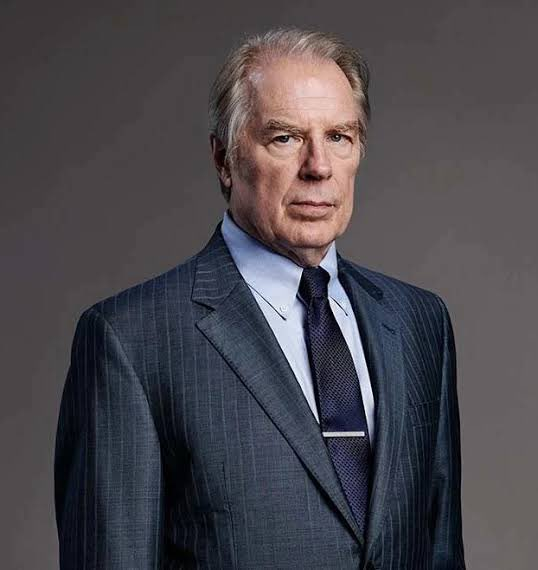